<a href="https://colab.research.google.com/github/pagaspandhutanoyo/Portofolio-Data/blob/main/Portofolio_Data_Analyst_Smart_City_%E2%80%93_Analisis_Transportasi_%26_Mobilitas_Kota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Formulasi Pertanyaan Analisis

Biar analisismu terarah, tentukan pertanyaan:

Bagaimana tren jumlah penumpang transportasi publik per bulan/tahun?

Jam sibuk (rush hour) transportasi publik kapan saja?

Rute atau koridor paling ramai?

Adakah hubungan antara kondisi cuaca (hujan) dan jumlah penumpang?

Insight apa yang bisa membantu perbaikan sistem transportasi kota?

In [ ]:
import pandas as pd

# Menggunakan pd.read_excel() untuk membaca file .xlsx
try:
    df = pd.read_excel('data.xlsx')
    print("Data berhasil diimpor.")
    display(df.head())
except FileNotFoundError:
    print("Error: File tidak ditemukan. Pastikan nama file dan path sudah benar.")
except Exception as e:
    print(f"Terjadi error saat mengimpor file: {e}")

Data berhasil diimpor.


,periode_data,tanggal,jenis_moda,jumlah_penumpang_per_hari
0,202402,2024-02-25,kapal,4535
1,202402,2024-02-26,kapal,1830
2,202402,2024-02-27,kapal,1673
3,202402,2024-02-28,kapal,1479
4,202402,2024-02-29,kapal,1477


In [ ]:
# 2. MISSING VALUES
print("📉 Missing Values per Kolom:")
print(df.isnull().sum())
print("\nPersentase Missing:")
print((df.isnull().sum() / len(df)) * 100)


📉 Missing Values per Kolom:
periode_data                 0
tanggal                      0
jenis_moda                   0
jumlah_penumpang_per_hari    0
dtype: int64

Persentase Missing:
periode_data                 0.0
tanggal                      0.0
jenis_moda                   0.0
jumlah_penumpang_per_hari    0.0
dtype: float64


In [ ]:
print(f"\n🔄 Jumlah baris duplikat: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("Menghapus duplikat...")
    df = df.drop_duplicates()


🔄 Jumlah baris duplikat: 0


In [ ]:
# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("\n📊 Outlier Detection (IQR Method):")
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outlier(s)")



📊 Outlier Detection (IQR Method):
periode_data: 0 outlier(s)


In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'], errors='coerce')

# Cek hasil
print("📅 Tipe data kolom tanggal setelah konversi:")
print(df.dtypes['tanggal'])

📅 Tipe data kolom tanggal setelah konversi:
datetime64[ns]


In [ ]:
# 1. Hari Kerja vs Akhir Pekan
df['hari_kerja'] = df['tanggal'].dt.dayofweek < 5  # Senin-Jumat = True
df['kategori_hari'] = df['hari_kerja'].map({True: 'Hari Kerja', False: 'Akhir Pekan'})

# 2. Jam Sibuk vs Non-Sibuk (asumsi kolom jam ada atau bisa diambil dari datetime)
# Jika kamu punya kolom jam terpisah, ganti 'nama_kolom_jam' dengan nama kolom jam
# Jika tidak, ambil dari kolom datetime
if 'nama_kolom_jam' in df.columns:
    df['jam'] = pd.to_datetime(df['nama_kolom_jam'], format='%H:%M:%S').dt.hour
else:
    df['jam'] = df['tanggal'].dt.hour

# Definisikan jam sibuk: 07-09 & 17-19
df['jam_sibuk'] = df['jam'].between(7, 9) | df['jam'].between(17, 19)
df['kategori_jam'] = df['jam_sibuk'].map({True: 'Jam Sibuk', False: 'Non-Sibuk'})

In [ ]:
df.head(10)

,periode_data,tanggal,jenis_moda,jumlah_penumpang_per_hari,hari_kerja,kategori_hari,jam,jam_sibuk,kategori_jam
0,202402,2024-02-25,kapal,4535,False,Akhir Pekan,0,False,Non-Sibuk
1,202402,2024-02-26,kapal,1830,True,Hari Kerja,0,False,Non-Sibuk
2,202402,2024-02-27,kapal,1673,True,Hari Kerja,0,False,Non-Sibuk
3,202402,2024-02-28,kapal,1479,True,Hari Kerja,0,False,Non-Sibuk
4,202402,2024-02-29,kapal,1477,True,Hari Kerja,0,False,Non-Sibuk
5,202402,2024-02-01,transjakarta,1155322,True,Hari Kerja,0,False,Non-Sibuk
6,202402,2024-02-02,transjakarta,1152107,True,Hari Kerja,0,False,Non-Sibuk
7,202402,2024-02-03,transjakarta,801212,False,Akhir Pekan,0,False,Non-Sibuk
8,202402,2024-02-04,transjakarta,670195,False,Akhir Pekan,0,False,Non-Sibuk
9,202402,2024-02-05,transjakarta,1159398,True,Hari Kerja,0,False,Non-Sibuk


In [ ]:
# Pastikan kolom tanggal sudah datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Tambahan kolom waktu (kalau belum ada)
df['tahun']   = df['tanggal'].dt.year
df['bulan']   = df['tanggal'].dt.month
df['jam']     = df['tanggal'].dt.hour
df['hari']    = df['tanggal'].dt.day_name()

1️⃣ Deskriptif Global & Per-Moda

In [ ]:
print("📊 GLOBAL")
# Konversi kolom 'jumlah_penumpang_per_hari' ke tipe data numerik
df['jumlah_penumpang_per_hari'] = pd.to_numeric(df['jumlah_penumpang_per_hari'], errors='coerce')

print("Total penumpang :", df['jumlah_penumpang_per_hari'].sum())
print("Rata-rata/hari  :", df['jumlah_penumpang_per_hari'].mean().round(1))

print("\n📊 PER MODA")
moda_stats = df.groupby('jenis_moda')['jumlah_penumpang_per_hari'].agg(['sum','mean','max'])
print(moda_stats)

📊 GLOBAL
Total penumpang : 1216325625.0
Rata-rata/hari  : 300847.3

📊 PER MODA
                              sum          mean        max
jenis_moda                                                
KCI Commuter Bandara    3488685.0  6.046248e+03    11287.0
bus sekolah            13238373.0  2.290376e+04    47235.0
kapal                   1933093.0  3.344452e+03    21846.0
krl                   521968225.0  9.046243e+05  1209506.0
lrt                     1905059.0  3.295950e+03     8345.0
mrt                    64953608.0  1.123765e+05   177911.0
transjakarta          608838582.0  1.055180e+06  1416595.0


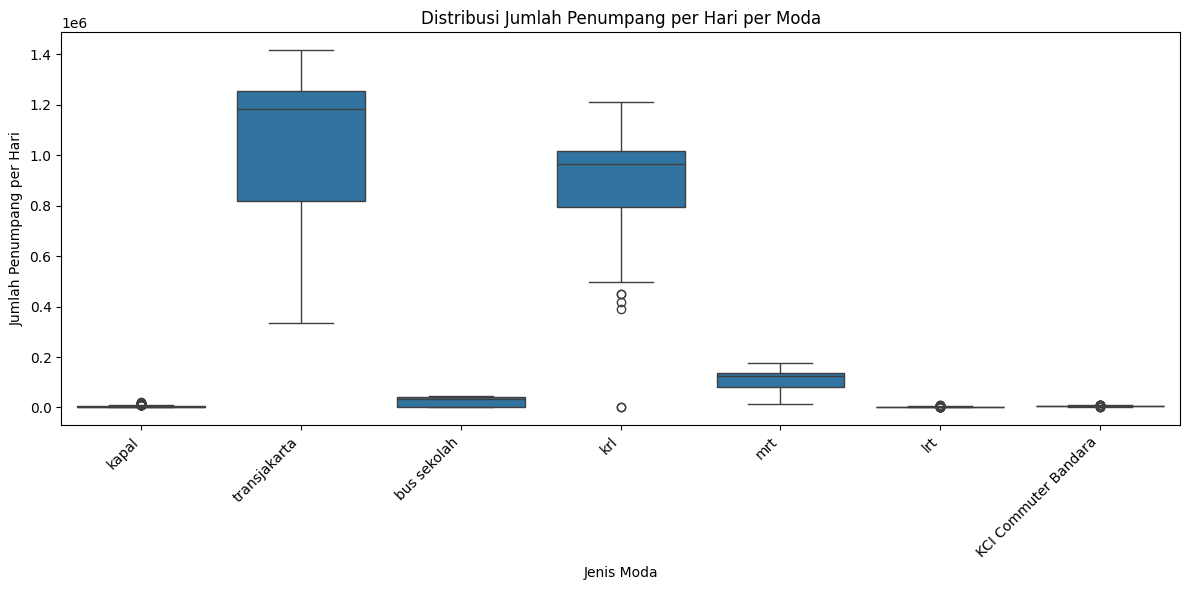

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='jenis_moda', y='jumlah_penumpang_per_hari')
plt.title('Distribusi Jumlah Penumpang per Hari per Moda')
plt.xlabel('Jenis Moda')
plt.ylabel('Jumlah Penumpang per Hari')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2️⃣ Time-Series per Moda (Bulanan)

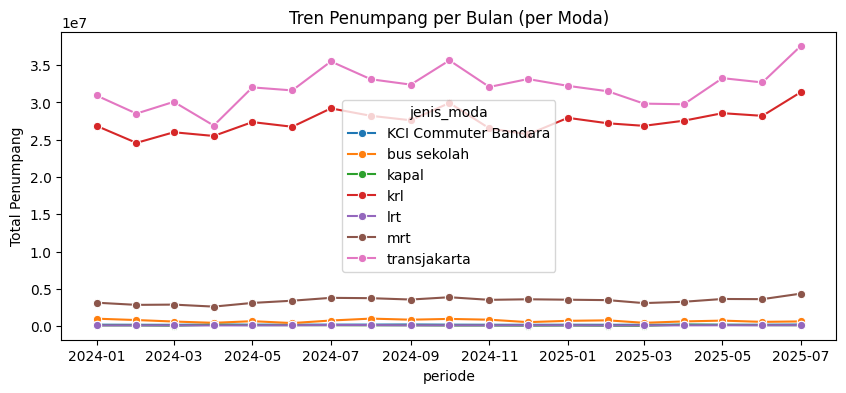

In [ ]:
monthly = df.groupby(['jenis_moda','tahun','bulan'])['jumlah_penumpang_per_hari'].sum().reset_index()

# Buat kolom string tanggal dalam format 'YYYY-MM-01'
monthly['date_str'] = monthly['tahun'].astype(str) + '-' + monthly['bulan'].astype(str).str.zfill(2) + '-01'

# Konversi kolom string ke tipe datetime
monthly['periode'] = pd.to_datetime(monthly['date_str'])

plt.figure(figsize=(10,4))
sns.lineplot(data=monthly, x='periode', y='jumlah_penumpang_per_hari',
             hue='jenis_moda', marker='o')
plt.title("Tren Penumpang per Bulan (per Moda)")
plt.ylabel("Total Penumpang")
plt.show()

3️⃣ Pola Harian dalam Seminggu

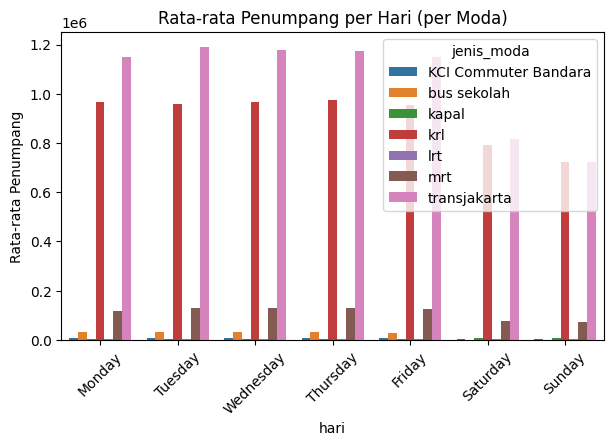

In [ ]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily = df.groupby(['jenis_moda','hari'])['jumlah_penumpang_per_hari'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=daily, x='hari', y='jumlah_penumpang_per_hari',
            hue='jenis_moda', order=day_order)
plt.title("Rata-rata Penumpang per Hari (per Moda)")
plt.ylabel("Rata-rata Penumpang")
plt.xticks(rotation=45)
plt.show()

4️⃣ Moda Paling Ramai vs Sepi

🔝 Moda Teramai:
jenis_moda
transjakarta            608838582.0
krl                     521968225.0
mrt                      64953608.0
bus sekolah              13238373.0
KCI Commuter Bandara      3488685.0
Name: jumlah_penumpang_per_hari, dtype: float64

🧊 Moda Tersedikit:
jenis_moda
mrt                     64953608.0
bus sekolah             13238373.0
KCI Commuter Bandara     3488685.0
kapal                    1933093.0
lrt                      1905059.0
Name: jumlah_penumpang_per_hari, dtype: float64


/tmp/ipython-input-1416386064.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=moda_total.values, y=moda_total.index, palette='viridis')


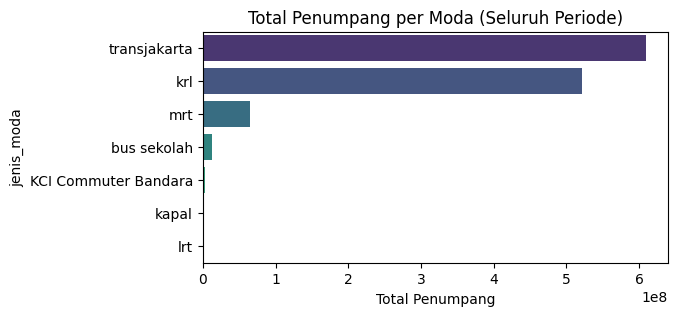

In [ ]:
moda_total = df.groupby('jenis_moda')['jumlah_penumpang_per_hari'].sum().sort_values(ascending=False)
print("🔝 Moda Teramai:")
print(moda_total.head())
print("\n🧊 Moda Tersedikit:")
print(moda_total.tail())

plt.figure(figsize=(6,3))
sns.barplot(x=moda_total.values, y=moda_total.index, palette='viridis')
plt.title("Total Penumpang per Moda (Seluruh Periode)")
plt.xlabel("Total Penumpang")
plt.show()

In [ ]:
print("📌 Ramai hari :",
      df.groupby('hari')['jumlah_penumpang_per_hari'].sum().idxmax())
print("📌 Moda ramai :", moda_total.index[0])

📌 Ramai hari : Tuesday
📌 Moda ramai : transjakarta


6. Kesimpulan Wawasan (Insight) & Rekomendasi
Berdasarkan analisis data jumlah penumpang transportasi publik yang telah dilakukan, berikut adalah beberapa wawasan utama dan rekomendasi yang dapat disimpulkan:

Wawasan (Insights) dari Data yang Tersedia:
Dominasi Moda: Data menunjukkan bahwa Transjakarta dan KRL adalah moda transportasi publik dengan jumlah penumpang total tertinggi secara signifikan di seluruh periode data. Moda Kapal dan LRT memiliki jumlah penumpang total yang paling sedikit.
Pola Harian: Rata-rata jumlah penumpang bervariasi sepanjang minggu, dengan hari Selasa mencatatkan rata-rata penumpang tertinggi dibandingkan hari lainnya. Akhir pekan (Sabtu dan Minggu) umumnya memiliki rata-rata penumpang yang lebih rendah.
Tren Bulanan: Grafik tren bulanan memperlihatkan fluktuasi atau pola pada jumlah penumpang dari waktu ke waktu untuk setiap jenis moda. Analisis lebih lanjut diperlukan untuk memahami faktor di balik tren ini (misalnya, dampak musim liburan, kebijakan baru, dll.).
Rekomendasi Berdasarkan Wawasan:
Fokus Strategis pada Moda Utama: Mengingat volume penumpang yang sangat besar pada Transjakarta dan KRL, pemerintah kota dan operator perlu memprioritaskan investasi dan peningkatan layanan (seperti penambahan kapasitas, perbaikan infrastruktur, dan peningkatan frekuensi) pada kedua moda ini.
Evaluasi dan Pengembangan Moda dengan Penumpang Rendah: Perlu dilakukan kajian mendalam mengapa moda seperti Kapal dan LRT memiliki jumlah penumpang rendah. Rekomendasi bisa mencakup:
Evaluasi cakupan rute dan konektivitas dengan moda lain.
Kampanye sosialisasi untuk meningkatkan kesadaran masyarakat tentang ketersediaan dan manfaat moda ini.
Peninjauan kembali tarif atau program promosi.
Optimalisasi Layanan di Hari Ramai: Pertimbangkan penyesuaian operasional (misalnya, peningkatan frekuensi atau kapasitas armada) pada hari-hari dengan volume penumpang tertinggi, seperti hari Selasa, untuk mengantisipasi lonjakan permintaan dan meningkatkan kenyamanan penumpang.
Analisis ini memberikan gambaran umum berdasarkan data yang ada. Untuk rekomendasi yang lebih spesifik (misalnya terkait jam sibuk atau rute tertentu), diperlukan data yang lebih granular dan analisis yang lebih mendalam pada aspek-aspek tersebut.